## Visualizing of EcoFOCI Glider Locations from Science Data Set - small selection

**Dives 300-399**

In [1]:
%matplotlib inline

In [32]:
import os
import glob

import xarray as xa
import numpy as np

import cmocean
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [3]:
data_dir = '/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/one_dtdz/'

In [9]:
xaf = xa.open_mfdataset(data_dir+'p40103*_m.nc',autoclose=True)
xad = xa.open_mfdataset(data_dir+'p40103*_d.nc',autoclose=True)
xau = xa.open_mfdataset(data_dir+'p40103*_u.nc',autoclose=True)

In [10]:
#sorted(dives)

xaf = xa.open_mfdataset(xaf_fn)
xad = xa.open_mfdataset(xad_fn)
xau = xa.open_mfdataset(xau_fn)

### Merged (despiked) Data

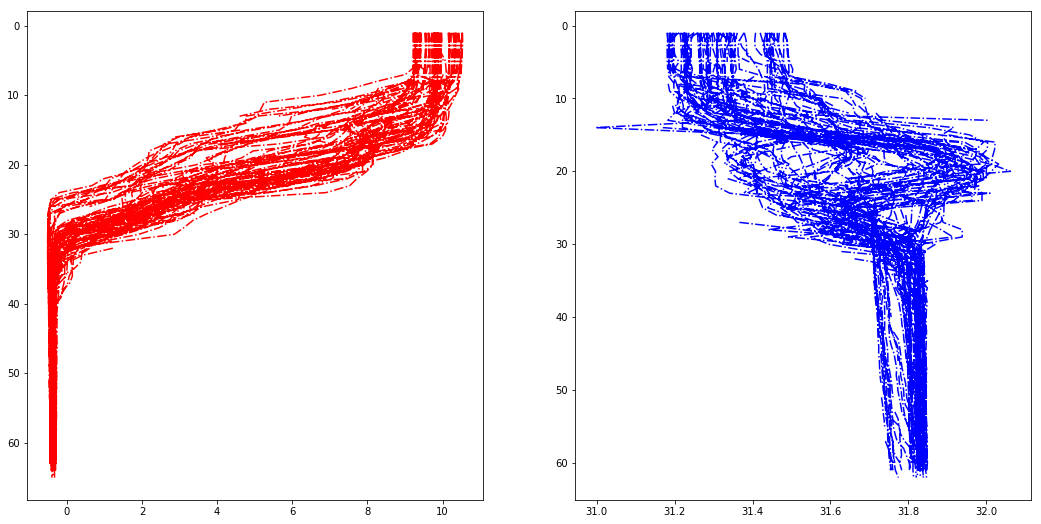

In [11]:
fig = plt.figure(3, figsize=(18,9), facecolor='w', edgecolor='w')
ax1 = fig.add_subplot(121)
plt.plot(xaf.Temperature,xaf.Pressure,'r-.')
ax1.invert_yaxis()
ax1 = fig.add_subplot(122)
plt.plot(xaf.Salinity,xaf.Pressure,'b-.')
ax1.invert_yaxis()


### Upcast / Downcast - unmerged data

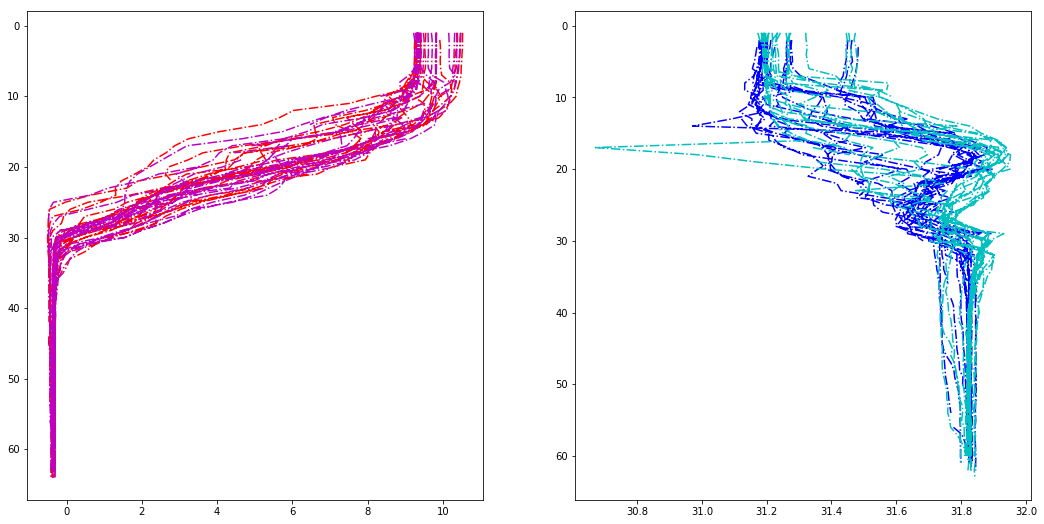

In [12]:
fig = plt.figure(3, figsize=(18,9), facecolor='w', edgecolor='w')
ax1 = fig.add_subplot(121)
plt.plot(xau.Temperature,xau.Pressure,'r-.')
plt.plot(xad.Temperature,xad.Pressure,'m-.')
ax1.invert_yaxis()
ax1 = fig.add_subplot(122)
plt.plot(xau.Salinity,xau.Pressure,'b-.')
plt.plot(xad.Salinity,xad.Pressure,'c-.')
ax1.invert_yaxis()

### Corrected data - Merged only

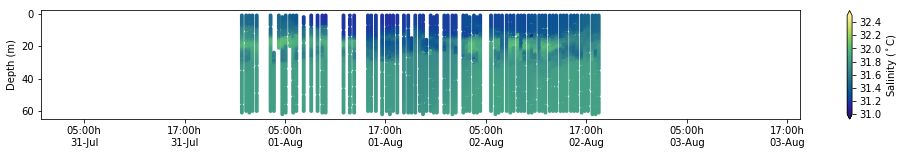

In [52]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(xaf.time.values, xaf.Pressure, s=15, c=xaf.Salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(xaf.time.values[0]-np.timedelta64(1,'D'), xaf.time.values[-1]+np.timedelta64(1,'D'))
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

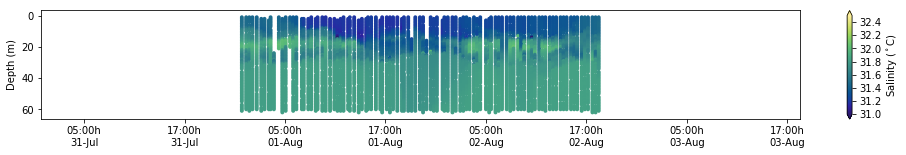

In [55]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(xau.time.values, xau.Pressure, s=15, c=xau.Salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)
cs = ax.scatter(xaf.time.values, xaf.Pressure, s=15, c=xaf.Salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(xaf.time.values[0]-np.timedelta64(1,'D'), xaf.time.values[-1]+np.timedelta64(1,'D'))
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

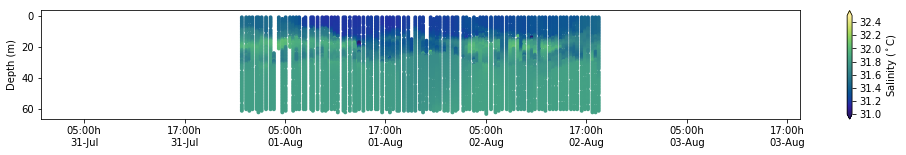

In [56]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(xad.time.values, xad.Pressure, s=15, c=xad.Salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)
cs = ax.scatter(xaf.time.values, xaf.Pressure, s=15, c=xaf.Salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(xaf.time.values[0]-np.timedelta64(1,'D'), xaf.time.values[-1]+np.timedelta64(1,'D'))
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');